# Practical 1: Pre-processing
#### Ayoub Bagheri
<img src="img/uu_logo.png" alt="logo" align="right" title="UU" width="50" height="20" />

In this practical, we are going to do some text preprocessing! Are you looking for Python documentation to refresh you knowledge of programming? If so, you can check https://docs.python.org/3/reference/

Google Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with:
* Zero configuration required
* Free access to GPUs
* Easy sharing

Colab notebooks are Jupyter notebooks that are hosted by Colab. Here you can find links to more detailed introductions to Colab: https://colab.research.google.com/notebooks/intro.ipynb

We need the following packages:

In [1]:
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd 
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # for bag of words feature extraction
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

Use can simply run `!pip install package_name` to install a package. Generally, you only need to install each package once on your computer and load it again, however, in Colab you may need to reinstall a package once you are reconnecting to the network.

NB: nltk package comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: http://nltk.org/nltk_data/

To install the data, after installing nltk, use nltk’s data downloader as "nltk.download()".

### Let's get started!

### Pre-processing a simple text
#### `If you feel comfortable with Python and Google colab skip to question 8.`

Open Colab and create a new empty notebook to work with Python 3! Go to https://colab.research.google.com/ and login with your account. Then click on "File $\rightarrow$ New notebook".

1\. **Text is known as a string object or as an array of characters. Create an object _a_ with the value of "Hello @Text Mining World! I'm here to learn everything, right?", and then print it!**

In [2]:
a = "Hello @Text Mining World! I'm here to learn everything, right?"
a

"Hello @Text Mining World! I'm here to learn everything, right?"

2\. **Since this is an array, print the first and last character of your object.**

In [3]:
print(a[0]) # if you do not use the print function, it will print only the last argumnet in the cell
print(a[61])
l = len(a)
print("Length of your string is: ", l)
print(a[l-1])

H
?
Length of your string is:  62
?


3\. **Use the function lower() from the nltk package to convert the characters in the object to their lowercase form and save it into a new object b.**

In [4]:
# nltk.download()
b = a.lower()
b

"hello @text mining world! i'm here to learn everything, right?"

4\. **Use the _string_ package to print the list of punctuations.**

Punctuations can separate characters, words, phrases, or sentences. In some applications they are very important to the task at hand, in others they are redundant and should be removed!

In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


5\. **Use the code below to remove the punctuations from the our string. Name your object c.**

In [6]:
# Remmebr there are many ways to remove punctuations! This is only one of them:
c = "".join([char for char in b if char not in string.punctuation])
print(c)

hello text mining world im here to learn everything right


6\. **Use the `word_tokenize` function from _nltk_ and tokenize string *b*. Compare that with the tokenization of string _c_.**

In [7]:
print(word_tokenize(b))
print(word_tokenize(c))
# You might need to download Punkt Tokenizer Models
# In this case, run the code nltk.download('punkt')

['hello', '@', 'text', 'mining', 'world', '!', 'i', "'m", 'here', 'to', 'learn', 'everything', ',', 'right', '?']
['hello', 'text', 'mining', 'world', 'im', 'here', 'to', 'learn', 'everything', 'right']


We see that the main difference is in punctuations, however, we also see that some words are now combined togehter in the tokenization of string c.

7\. **Use sent_tokenize function from the _nltk_ package and split string b into sentences. Compare that with the sentence tokenization of string c.**

In [8]:
print(sent_tokenize(b))
print(sent_tokenize(c))

['hello @text mining world!', "i'm here to learn everything, right?"]
['hello text mining world im here to learn everything right']


Sentence tokenization can be used in different purposes. For example, to count average words per sentence.

### Pre-processing a text corpus

Pre-processing a corpus is similar to pre-processing a text string. 

Here are some resources for puclic text data sets:
- CLARIN Resource Families: https://www.clarin.eu/portal
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=nameUp&view=table
- Kaggle: https://www.kaggle.com/

Here, we want to analyze and pre-process a Drug Review data set from Drugs.com. The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.

https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

8\. **Read the “drug.csv” data set. Check the head and tail functions.**

In [9]:
drug_reviews = pd.read_csv("data/drugs.csv", dtype=str)

In [10]:
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [11]:
drug_reviews.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
995,206768,Methadose,Chronic Pain,"""I&#039;ve taken Methadone for 20 months now f...",10,13-Mar-13,110
996,51119,Azithromycin,Chlamydia Infection,"""I took 2 of the pink 500mg pills. I had 2 sli...",8,16-Jun-16,2
997,31578,Miconazole,Vaginal Yeast Infection,"""So I&#039;ve been dealing with some itchy on ...",1,25-Mar-16,8
998,41072,Acetaminophen / oxycodone,Chronic Pain,"""I was involved in a car accident half a year ...",8,28-Mar-14,55
999,208259,Oseltamivir,Influenza,"""I was on day 2 of feeling flu symptoms, I wen...",10,29-Apr-16,5


9\. **When we quickly check the review column from our data set, we see some weird characters "&#039". Use the code below to replace them with proper characters. In this code, a new column has been added to the dataframe, _Preprocessed review_. We are going to fill this column out with the preprocessed text including the steps in the following questions.**

In [12]:
def remove_weird(text):
    """custom function to remove special characters"""
    return re.sub('&#039;', ' ha', str(text))

drug_reviews["Preprocessed review"] = drug_reviews["review"].apply(lambda text: remove_weird(text))
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,"""I have tried a few antidepressants over the y..."
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,"""My son has Crohn has disease and has done ver..."
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,"""Quick reduction of symptoms"""
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,"""Contrave combines drugs that were used for al..."
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,"""I have been on this birth control for one cyc..."


10\. **Write a custom function to remove the punctuations. (Hint: You can use the method in question 5 or make use of the function maketrans from the string package.)**

In [13]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].apply(lambda text: remove_punctuation(text))
drug_reviews.head()


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,I have tried a few antidepressants over the ye...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,My son has Crohn has disease and has done very...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Quick reduction of symptoms
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,Contrave combines drugs that were used for alc...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,I have been on this birth control for one cycl...


In [14]:
def remove_schars(text):
    """alternatively you can use this function to remove all the special characters"""
    return re.sub('[^A-Za-z0-9]+', ' ', str(text))

drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].apply(lambda text: remove_schars(text))
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,I have tried a few antidepressants over the ye...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,My son has Crohn has disease and has done very...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Quick reduction of symptoms
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,Contrave combines drugs that were used for alc...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,I have been on this birth control for one cycl...


11\. **Convert the characters to their lower forms. Think about why and when we need this step in our analysis.**

In [15]:
drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].str.lower()
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i have tried a few antidepressants over the ye...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn has disease and has done very...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,contrave combines drugs that were used for alc...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,i have been on this birth control for one cycl...


12\. **Use the code below to list the 20 most frequent terms in your preprocessed review.**

In [16]:
# To get all reviews in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(review for review in drug_reviews["Preprocessed review"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)


[('i', 3729), ('and', 1873), ('the', 1778), ('to', 1445), ('it', 1406), ('my', 1333), ('a', 1282), ('have', 963), ('for', 874), ('was', 828), ('of', 805), ('this', 666), ('on', 587), ('but', 537), ('had', 528), ('in', 513), ('me', 497), ('is', 480), ('with', 468), ('has', 440)]


You see that these are mainly the stop words. Before removing them let's plot a worcloud of our data.

13\. **Use the code below to plot a wordcloud with a maximum of 50 words. Check the command _?WordCloud_ to review the help page of this function.**

In [17]:
?WordCloud

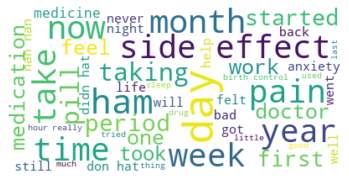

In [18]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

14\. **Run the codes given below to remvoe the stop words, and update the stop words by adding words: "im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt". Show the 20 most frequent terms and plot the wordcould of 50 words again.**

In [19]:
# run the code nltk.download('stopwords') if needed
stop_words = set(stopwords.words('english'))
print(stop_words)

{'my', 'have', 'how', 'now', "needn't", 'needn', 'down', 'during', 'aren', 'but', 'after', 'doesn', "you've", 'each', 'with', 'ourselves', 'yourselves', 'him', 'once', 'shouldn', 'any', 'won', 'too', "wasn't", 'it', 'had', 'their', 'into', 'these', 'the', 'what', 'do', 'doing', 'most', 'ma', 'be', 'is', 'your', 'd', 'or', 'by', 'not', 'don', 'his', 'haven', 'itself', 'll', 'nor', 'this', 'ours', 'hers', 'yours', 'will', 'couldn', 'yourself', "couldn't", 'are', 'having', 'y', 'myself', "isn't", 'same', 'does', "wouldn't", "should've", 'out', 'can', "don't", 'only', 'if', 'more', 'was', 'hadn', 'before', 'didn', 'isn', 'there', "you're", 'further', 'am', "she's", 'up', 'because', 'few', 'mightn', 'o', 'i', 'why', 'them', 'again', 'an', "mustn't", 'other', 't', 'shan', 'herself', 'that', 'as', "hasn't", 'about', "shouldn't", "you'll", 'ain', 'theirs', 'you', 'were', "shan't", 'weren', 'has', "it's", 'a', "hadn't", "weren't", 'wasn', 'no', 'above', 'some', 'her', 'and', 'our', 'been', "doe

In [20]:
stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"])
# stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)

{'my', 'have', 'how', 'now', "needn't", 'needn', 'down', 'during', 'aren', 'but', 'after', 'doesn', "you've", 'each', 'with', 'ourselves', 'yourselves', 'him', 'once', 'shouldn', 'any', 'won', 'too', "wasn't", 'it', 'had', 'their', 'into', 'youre', 'these', 'the', 'what', 'do', 'doing', 'most', 'ma', 'be', 'is', 'your', 'd', 'or', 'by', 'not', 'don', 'his', 'haven', 'itself', 'll', 'nor', 'this', 'ours', 'hers', 'yours', 'will', 'couldn', 'yourself', "couldn't", 'are', 'having', 'y', 'myself', 'cant', "isn't", 'same', 'does', "wouldn't", "should've", 'didnt', 'out', 'can', "don't", 'only', 'if', 'ive', 'more', 'was', 'hadn', 'before', 'didn', 'isn', 'dont', 'there', 'ill', "you're", 'further', 'am', "she's", 'up', 'because', 'few', 'id', 'mightn', 'o', 'i', 'why', 'them', 'again', 'an', "mustn't", 'other', 't', 'shan', 'hasnt', 'herself', 'that', 'as', "hasn't", 'about', "shouldn't", "you'll", 'ain', 'theirs', 'you', 'were', "shan't", 'weren', 'has', "it's", 'a', "hadn't", "weren't", '

In [21]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].apply(lambda text: remove_stopwords(text))
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,tried antidepressants years citalopram fluoxet...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,son crohn disease done well asacol complaints ...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction symptoms
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,contrave combines drugs used alcohol smoking o...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,birth control one cycle reading reviews type s...


In [22]:
from collections import Counter
# To get all reviews in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(review for review in drug_reviews["Preprocessed review"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)

[('hat', 425), ('ham', 250), ('day', 249), ('taking', 238), ('side', 220), ('years', 212), ('first', 191), ('pain', 191), ('started', 189), ('months', 186), ('effects', 185), ('take', 181), ('like', 173), ('get', 165), ('days', 160), ('would', 159), ('time', 157), ('nan', 148), ('2', 147), ('pill', 147)]


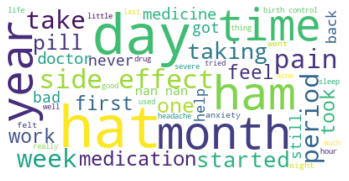

In [23]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

15\. **We can apply stemming or lemmatization on our text data. Apply a lemmatizer from nltk and save the results.**

In [24]:
# run the code nltk.download('wordnet') if needed
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].apply(lambda text: lemmatize_words(text))
drug_reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Preprocessed review
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,tried antidepressant year citalopram fluoxetin...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,son crohn disease done well asacol complaint s...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction symptom
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,contrave combine drug used alcohol smoking opi...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,birth control one cycle reading review type si...


And here is the code for stemming:

In [25]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming; though you can try it!
# drug_reviews["Preprocessed review"] = drug_reviews["Preprocessed review"].apply(lambda text: stem_words(text))
# drug_reviews.head()


The PorterStemmer is proposed for English. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are:

In [26]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

### Vector space model: Bag-of-Words

16\. **Use the CountVectorizer from the sklearn package and build a bag of words model on _Preprocessed review_ based on term frequency. Check the shape of the output matrix.**

In [27]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer1 = CountVectorizer(max_features = 3000) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our data into feature vectors. 
# The input to fit_transform should be a list of strings.
dtm = vectorizer1.fit_transform(drug_reviews["Preprocessed review"])
print(dtm.shape)

(1000, 3000)


In [28]:
dtm

<1000x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 24290 stored elements in Compressed Sparse Row format>

In [29]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


17\. **Inspect the first 100 terms in the vocabulary.**

In [30]:
# Take a look at the words in the vocabulary
vocab = vectorizer1.get_feature_names()
print(vocab[1:100])

['06mg', '10', '100', '1000', '100mg', '101', '1014', '1015', '1030', '105', '10lbs', '10mg', '10x', '11', '110', '12', '120', '120mg', '12mg', '13', '14', '145', '145lbs', '14th', '15', '150', '150mg', '15mg', '16', '17', '18', '1800mg', '19', '199', '1mg', '1st', '20', '200', '2000', '2004', '2006', '2007', '2009', '200mcg', '200mg', '2011', '2012', '2013', '2014', '2015', '2017', '2030', '20mg', '21', '22', '23', '230', '24', '25', '250', '25mg', '26', '27', '28', '29', '2mg', '2nd', '2x', '2xday', '30', '300', '30mg', '31', '31st', '32', '33', '34', '35', '36', '375', '38', '39', '3days', '3rd', '3x', '40', '400mcg', '400mg', '40mg', '42', '43', '45', '46', '48', '4pm', '4th', '50', '500', '500mg']


C:\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18\. **Using TfidfVectorizer, you can create a model based on tfidf. Use the code below to apply a TfidfVectorizer on your text data. Does the shape of the output matrix differ from dtm?**

In [31]:
# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(drug_reviews["Preprocessed review"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(1000, 4822)


19\. **Use the TfidfVectorizer to create an n-gram based model with n = 1 and 2. (Hint: Use the ngram_range argument to determine the lower and upper boundary of the range of n-values for different n-grams to be extracted.)**

In [32]:
# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(drug_reviews["Preprocessed review"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(1000, 28641)


**Having document-term matrices, we can run a classification pipeline and predict some outcome. Try this as a homework for the prediction of patients drug rating.**